In [ ]:
from keras.datasets import imdb

In [ ]:
((XT, YT), (Xt, Yt)) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 1s 0us/step


In [ ]:
words_index = imdb.get_word_index()

1641221/1641221 [==============================] - 0s 0us/step


In [ ]:
XT

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [ ]:
idx_word = dict([(value, key) for (key, value) in words_index.items()])

In [ ]:
idx_word

In [ ]:
actual_review = " ".join([idx_word.get(idx-3, "") for idx in XT[0]])

In [ ]:
actual_review

" this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert  is an amazing actor and now the same being director  father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for  and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also  to the two little boy's that played the  of norman and paul they were just brilliant children are often left out of the  list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you think the

In [ ]:
import numpy as np
def vectorize_sentences(sentences, dim=10000):

  outputs = np.zeros((len(sentences), dim))
  for (i, idx) in enumerate(sentences):
    outputs[i, idx] = 1
  return outputs

In [ ]:
XTrain, XTest = vectorize_sentences(XT), vectorize_sentences(Xt)

In [ ]:
XTrain.shape

(25000, 10000)

In [ ]:
XTest.shape

(25000, 10000)

In [ ]:
YTrain = np.asarray(YT).astype('float32')
YTest = np.asarray(Yt).astype('float32')

In [ ]:
YTrain.shape

(25000,)

In [ ]:
from keras.layers import Dense
from keras import models

In [ ]:
model = models.Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics='accuracy')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


## Training and Validation

In [ ]:
x_val = XTrain[:5000]
XTrainNew = XTrain[5000:]

y_val = YTrain[:5000]
YTrainNew = YTrain[5000:]

In [ ]:
hist = model.fit(XTrainNew, YTrainNew, batch_size=512, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20
40/40 [==============================] - 3s 49ms/step - loss: 0.5284 - accuracy: 0.7879 - val_loss: 0.4000 - val_accuracy: 0.8610
Epoch 2/20
40/40 [==============================] - 2s 50ms/step - loss: 0.3188 - accuracy: 0.8933 - val_loss: 0.3527 - val_accuracy: 0.8540
Epoch 3/20
40/40 [==============================] - 2s 53ms/step - loss: 0.2411 - accuracy: 0.9162 - val_loss: 0.2785 - val_accuracy: 0.8914
Epoch 4/20
40/40 [==============================] - 2s 45ms/step - loss: 0.1953 - accuracy: 0.9325 - val_loss: 0.2754 - val_accuracy: 0.8918
Epoch 5/20
40/40 [==============================] - 1s 37ms/step - loss: 0.1694 - accuracy: 0.9408 - val_loss: 0.2792 - val_accuracy: 0.8918
Epoch 6/20
40/40 [==============================] - 2s 47ms/step - loss: 0.1442 - accuracy: 0.9510 - val_loss: 0.2892 - val_accuracy: 0.8890
Epoch 7/20
40/40 [==============================] - 1s 34ms/step - loss: 0.1269 - accuracy: 0.9583 - val_loss: 0.3422 - val_accuracy: 0.8728
Epoch 8/20
40

## Visualize our results

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
h = hist.history

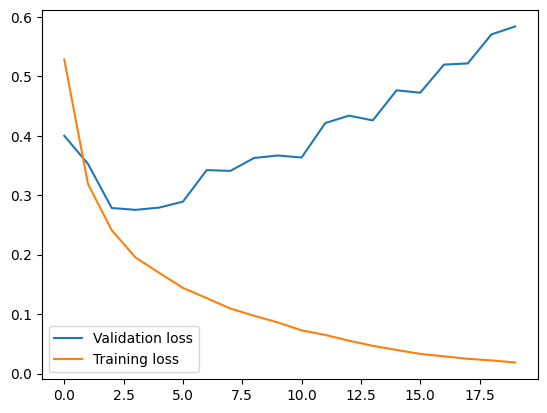

In [ ]:
plt.plot(h['val_loss'], label="Validation loss")
plt.plot(h['loss'], label="Training loss")
plt.legend()
plt.show()

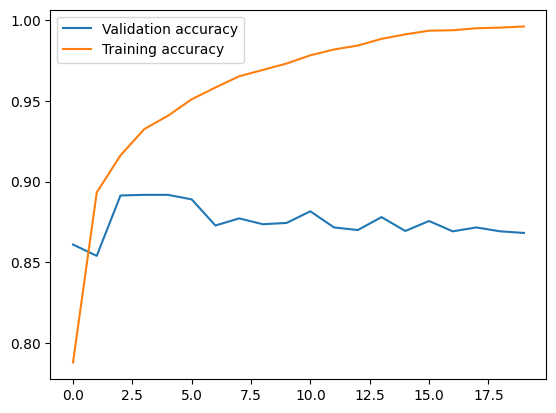

In [ ]:
plt.plot(h['val_accuracy'], label="Validation accuracy")
plt.plot(h['accuracy'], label="Training accuracy")
plt.legend()
plt.show()

In [ ]:
model.evaluate(x_val, y_val)[1]

157/157 [==============================] - 0s 3ms/step - loss: 0.5838 - accuracy: 0.8682


0.8682000041007996

In [ ]:
model.evaluate(XTrainNew, YTrainNew)[1]

625/625 [==============================] - 2s 3ms/step - loss: 0.0139 - accuracy: 0.9991


0.9990500211715698

In [ ]:
model.evaluate(XTrain, YTrain)[1]

782/782 [==============================] - 3s 3ms/step - loss: 0.1279 - accuracy: 0.9729


0.9728800058364868

In [ ]:
model.evaluate(XTest, YTest)[1]

782/782 [==============================] - 2s 3ms/step - loss: 0.6374 - accuracy: 0.8583


0.8582800030708313

## NOW, Early stopping

In [ ]:
hist = model.fit(XTrain, YTrain, batch_size=512, epochs=5, validation_data=(x_val, y_val))

Epoch 1/5
49/49 [==============================] - 3s 62ms/step - loss: 0.1199 - accuracy: 0.9723 - val_loss: 0.2596 - val_accuracy: 0.9276
Epoch 2/5
49/49 [==============================] - 2s 49ms/step - loss: 0.0774 - accuracy: 0.9812 - val_loss: 0.1703 - val_accuracy: 0.9524
Epoch 3/5
49/49 [==============================] - 2s 38ms/step - loss: 0.0572 - accuracy: 0.9864 - val_loss: 0.1287 - val_accuracy: 0.9640
Epoch 4/5
49/49 [==============================] - 2s 33ms/step - loss: 0.0450 - accuracy: 0.9900 - val_loss: 0.1358 - val_accuracy: 0.9492
Epoch 5/5
49/49 [==============================] - 2s 37ms/step - loss: 0.0351 - accuracy: 0.9928 - val_loss: 0.0758 - val_accuracy: 0.9814


In [ ]:
h = hist.history

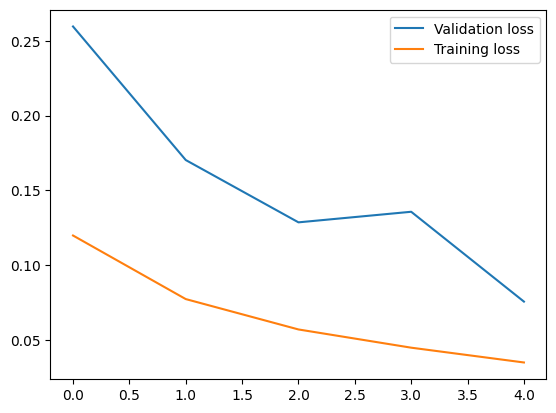

In [ ]:
plt.plot(h['val_loss'], label="Validation loss")
plt.plot(h['loss'], label="Training loss")
plt.legend()
plt.show()

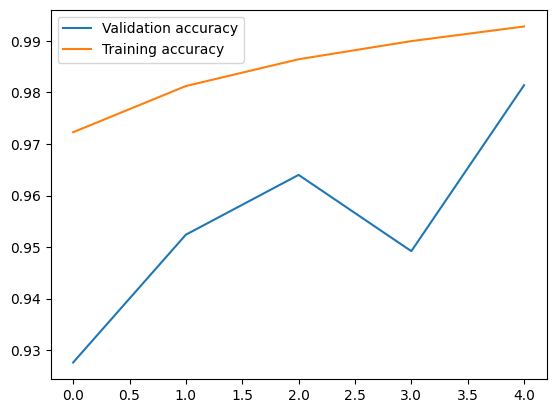

In [ ]:
plt.plot(h['val_accuracy'], label="Validation accuracy")
plt.plot(h['accuracy'], label="Training accuracy")
plt.legend()
plt.show()

In [ ]:
model.evaluate(XTest, YTest)[1]

782/782 [==============================] - 2s 3ms/step - loss: 0.5899 - accuracy: 0.8564


0.8564000129699707

In [ ]:
model.evaluate(XTrain, YTrain)[1]

782/782 [==============================] - 3s 4ms/step - loss: 0.0280 - accuracy: 0.9953


0.9953200221061707